## 감정 분석  
<br>

<b>목차</b>  
(0) [변수 정리](#변수-정리)  
(1) [감성대화말뭉치 tokenized 버전](#(1)-감성대화말뭉치-tokenized-버전)  
(2) [감성대화말뭉치 추가 전처리](#(2)-감성대화말뭉치-추가-전처리)  
(3) [train data의 라벨 분포 확인](#(3)-train-data의-라벨-분포-확인)  
(4) [정수 인코딩](#(4)-정수-인코딩)  
(5) [패딩(padding)](#(5)-패딩(padding))  
(6) [모델링(Modeling)](#(6)-모델링(Modeling))

In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

#### (0) 변수 정리  
- sa: 감성대화말뭉치(ver.토큰) 원본 file  
- ssa: sa[['text_tokenized2', 'bi_sent']] → 감성대화말뭉치에서 토큰, 라벨만 필터링  
- train_data, test_data: 감성대화말뭉치를 3:1 비율로 split  
- df = 추출한 '키워드' 데이터 토큰화한 원본  
- a = '키워드' 데이터의 토큰, type: Series  
- aa = '키워드' 데이터의 토큰, type: 2-dim array  
- ssaa = 감성대화말뭉치 토큰, type: 2-dim array  
- ssa = aa + ssaa, 키워드 토큰 + 감성대화말뭉치 토큰  
- X_train, y_train, X_test, y_test = ssa 데이터프레임 필터  
- ssa_int = ssa 정수 인코딩  
- ssa_int_pad = 패딩 적용

------------------------------------------------

#### (1) 감성대화말뭉치 tokenized 버전  

<b>* crawling_data/감성대화말뭉치_ver토큰최종_Training.csv</b>  
- Text: 원문  
- Label: 글의 대표적인 감정 라벨  
- text_tokenized: sentence split, 형태소(n,v,a) 분리  
- text_tokenized2: 불용어 처리

In [2]:
sa = pd.read_csv('./crawling_data/감성대화말뭉치_ver토큰최종_Training.csv', encoding='utf-8 sig') #미리 토큰화한 감성 문서 활용
del sa['Unnamed: 0']

In [3]:
sa

,Text,Label,text_tokenized,text_tokenized2
0,아내가 드디어 출산하게 되어서 정말 신이 나.,기쁨,"['아내', '드디어', '출산', '하다', '되어다', '정말', '신', '나']","['아내', '드디어', '출산', '정말', '신']"
1,당뇨랑 합병증 때문에 먹어야 할 약이 열 가지가 넘어가니까 스트레스야.,불안,"['당뇨', '합병증', '때문', '먹다', '하다', '약', '열', '가지'...","['당뇨', '합병증', '때문', '먹다', '약', '열', '가지', '넘어가..."
2,고등학교에 올라오니 중학교 때보다 수업이 갑자기 어려워져서 당황스러워.,당황,"['고등학교', '올라오다', '중학교', '때', '수업', '갑자기', '어려워...","['고등학교', '올라오다', '중학교', '수업', '갑자기', '어려워지다', ..."
3,재취업이 돼서 받게 된 첫 월급으로 온 가족이 외식을 할 예정이야. 너무 행복해.,기쁨,"['재', '취업', '돼다', '받다', '되다', '첫', '월급', '온', ...","['취업', '받다', '첫', '월급', '가족', '외식', '예정', '행복하다']"
4,빚을 드디어 다 갚게 되어서 이제야 안도감이 들어.,기쁨,"['빚', '드디어', '다', '갚다', '되어다', '이제야', '안도', '감...","['빚', '드디어', '갚다', '이제야', '안도', '감', '들다']"
...,...,...,...,...
40874,같이 사는 친구가 애완견을 데려왔는데 대부분 내가 돌보고 있어. 내가 주인인가 혼란...,불안,"['같이', '살다', '친구', '애완견', '데려오다', '대부분', '내', ...","['살다', '친구', '애완견', '데려오다', '대부분', '돌보다', '주인'..."
40875,지난주에 건강검진 결과가 나왔는데 정상이라고 결과가 나왔어.,기쁨,"['지난주', '건강검진', '결과', '나오다', '정상', '결과', '나오다']","['지난주', '건강검진', '결과', '나오다', '정상', '결과', '나오다']"
40876,엄마는 내 꿈인 작가를 응원해 주고는 했는데 지금은 안 그래. 너무 슬퍼.,슬픔,"['엄마', '내', '꿈', '작가', '응원', '하다', '주다', '하다',...","['엄마', '꿈', '작가', '응원', '주다', '지금', '그렇다', '슬프다']"
40877,이렇게 좋은 운동 시설에서 경로 우대로 운동할 수 있다니 참 행운이야.,기쁨,"['이렇게', '좋다', '운동', '시설', '경로', '우대', '운동', '하...","['이렇게', '좋다', '운동', '시설', '경로', '우대', '운동', '차..."


#### (2) 감성대화말뭉치 추가 전처리  
* 감정_대분류:  
1 = 기쁨  
0 = 불안, 슬픔, 분노, 상처, 불안  
당황은 제거  


<참고> 네이버 쇼핑 리뷰 감성 분류하기 https://wikidocs.net/94600

In [4]:
sa['Label'].unique()

array(['기쁨', '불안', '당황', '슬픔', '분노', '상처', '불안 ', '기쁨 '], dtype=object)

In [5]:
sa = sa[sa.Label != '당황']

In [6]:
sa['bi_sent'] = 0
sa['bi_sent'][(sa['Label'] == '기쁨')] = 1

C:\Users\eunah.lee\AppData\Local\Temp/ipykernel_13868/3765721047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sa['bi_sent'] = 0
C:\Users\eunah.lee\AppData\Local\Temp/ipykernel_13868/3765721047.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sa['bi_sent'][(sa['Label'] == '기쁨')] = 1
C:\Users\eunah.lee\Anaconda3\lib\site-packages\pandas\core\generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

In [7]:
sa[(sa['bi_sent']==1)] # 6,730
sa[(sa['bi_sent']==0)] # 27,789

,Text,Label,text_tokenized,text_tokenized2,bi_sent
1,당뇨랑 합병증 때문에 먹어야 할 약이 열 가지가 넘어가니까 스트레스야.,불안,"['당뇨', '합병증', '때문', '먹다', '하다', '약', '열', '가지'...","['당뇨', '합병증', '때문', '먹다', '약', '열', '가지', '넘어가...",0
5,이제 곧 은퇴할 시기가 되었어. 내가 먼저 은퇴를 하고 육 개월 후에 남편도 은퇴를...,불안,"['이제', '곧', '은퇴', '하다', '시기', '되어다', '내', '먼저'...","['이제', '은퇴', '시기', '먼저', '은퇴', '개월', '남편', '은퇴...",0
6,사십 대에 접어들면서 머리카락이 많이 빠져 고민이야.,슬픔,"['사다', '대다', '접다', '들다', '머리카락', '많이', '빠지다', ...","['사다', '대다', '접다', '들다', '머리카락', '많이', '빠지다', ...",0
7,이제 돈이라면 지긋지긋해.,분노,"['이제', '돈', '라면', '지긋지긋하다']","['이제', '돈', '라면', '지긋지긋하다']",0
8,친구들이 나를 괴롭혀. 부모님과 선생님께 얘기했는데도 믿어주지 않아.,분노,"['친구', '나르다', '괴롭히다', '부모님', '선생님', '얘기', '하다'...","['친구', '나르다', '괴롭히다', '부모님', '선생님', '얘기', '믿다'...",0
...,...,...,...,...,...
40872,오늘 식당에서 서빙을 하는데 젊은 청년들이 반말하길래 기분이 나빠 나도 반말을 하며...,분노,"['오늘', '식당', '서빙', '하다', '젊다', '청년', '반말', '하다...","['오늘', '식당', '서빙', '젊다', '청년', '반말', '기분', '나쁘...",0
40873,최 영감이 노인들에게 나를 이상한 사람으로 이야기해서 답답하고 억울해.,상처,"['최', '영감', '노인', '나르다', '이상하다', '사람', '이야기', ...","['최', '영감', '노인', '나르다', '이상하다', '사람', '이야기', ...",0
40874,같이 사는 친구가 애완견을 데려왔는데 대부분 내가 돌보고 있어. 내가 주인인가 혼란...,불안,"['같이', '살다', '친구', '애완견', '데려오다', '대부분', '내', ...","['살다', '친구', '애완견', '데려오다', '대부분', '돌보다', '주인'...",0
40876,엄마는 내 꿈인 작가를 응원해 주고는 했는데 지금은 안 그래. 너무 슬퍼.,슬픔,"['엄마', '내', '꿈', '작가', '응원', '하다', '주다', '하다',...","['엄마', '꿈', '작가', '응원', '주다', '지금', '그렇다', '슬프다']",0


In [8]:
ssa = sa[['text_tokenized2','bi_sent']]
X = ssa['text_tokenized2']
y = ssa['bi_sent']

In [9]:
# train : test = 3 : 1
train_data, test_data = train_test_split(ssa, test_size = 0.1, shuffle=True,  random_state = 42)

In [11]:
print('훈련용 리뷰의 개수 :', len(train_data))
print('테스트용 리뷰의 개수 :', len(test_data))
print(train_data.groupby('bi_sent').size().reset_index(name = 'count'))

훈련용 리뷰의 개수 : 31067
테스트용 리뷰의 개수 : 3452
   bi_sent  count
0        0  25016
1        1   6051


In [12]:
train_data

,text_tokenized2,bi_sent
36811,"['새롭다', '부서', '발령', '받다', '명예퇴직', '대상자', '모으다'...",0
11145,"['오늘', '사장', '칭찬', '받다', '기쁘다']",1
24277,"['아내', '몰래', '아들', '출금', '갚다']",0
38533,"['대입', '면접', '망치다']",0
24586,"['애', '괴롭히다', '보다', '무섭다']",0
...,...,...
19948,"['신부전증', '치료', '비다', '믿다', '맡기다', '배신', '당하다']",0
7392,"['의사', '생각', '간경변증', '빠르다', '진행', '말', '우울하다']",0
13345,"['맡다', '프로젝트', '까다롭다', '팀원', '자다', '해내다', '믿다']",1
1026,"['진로', '대해', '자다', '알다', '불구', '성적', '때문', '진학...",0


#### (3) train data의 라벨 분포 확인

In [13]:
negative_words = np.hstack(train_data[train_data.bi_sent == 0]['text_tokenized2'].values)
positive_words = np.hstack(train_data[train_data.bi_sent == 1]['text_tokenized2'].values)

In [14]:
from collections import Counter

negative_word_count = Counter(negative_words)
print("부정 리뷰에서 빈도수가 높은 Top 20 단어")
print(negative_word_count.most_common(20))
print()
print("긍정 리뷰에서 빈도수가 높은 Top 20 단어")
positive_word_count = Counter(positive_words)
print(positive_word_count.most_common(20))

부정 리뷰에서 빈도수가 높은 Top 20 단어
[("['취업']", 9), ("['요즘', '혼란', '스럽다']", 6), ("['실망하다']", 5), ("['오늘', '기분', '좋다']", 5), ("['속상하다']", 5), ("['슬프다']", 5), ('[]', 5), ("['기분', '좋다']", 4), ("['학교', '가기', '싫다']", 4), ("['일만', '아니다', '원하다', '대학', '가다']", 4), ("['어떻다', '이렇다']", 4), ("['남자친구', '헤어지다']", 4), ("['억울하다']", 4), ("['정년', '퇴직', '질환', '고생']", 4), ("['정말', '억울하다']", 4), ("['요즘', '슬프다']", 4), ("['면접', '떨어지다']", 4), ("['건강', '배신', '느낌']", 4), ("['요즘', '힘들다']", 4), ("['요즘', '걱정']", 4)]

긍정 리뷰에서 빈도수가 높은 Top 20 단어
[("['오늘', '감사하다']", 4), ("['승진']", 4), ("['요즘', '기분', '좋다']", 4), ("['기분', '좋다']", 4), ("['요즘', '행복하다']", 4), ("['퇴직', '재정', '안정', '스트레스', '사라지다', '매일', '행복하다']", 3), ("['아들', '결혼', '이제', '크다', '돈', '나가다', '뿌듯하다']", 3), ("['로또', '당첨']", 3), ("['보험', '회사', '건강', '축하', '금', '크다', '돈', '보내다', '이렇게', '크다', '돈', '만족스럽다']", 3), ("['남자친구', '프러포즈', '받다']", 3), ("['괴롭힘', '당하다', '반', '친구', '도와주다', '약속']", 3), ("['드디어', '취업']", 3), ("['부서', '발령', '받다', '원하다', '부서', '배치', '받다', '기쁘다']", 3), ("['출산

긍정 리뷰의 평균 길이 : 42.49876053544869
부정 리뷰의 평균 길이 : 43.54557083466582


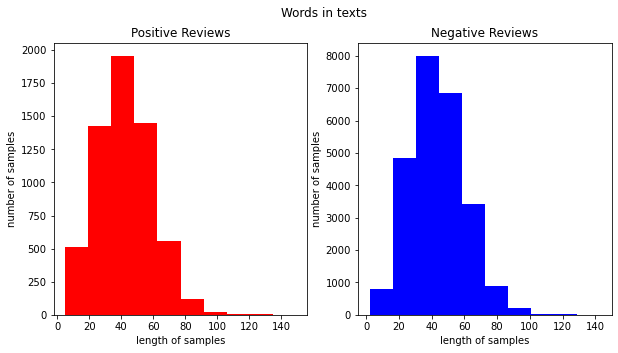

In [15]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
text_len = train_data[train_data['bi_sent']==1]['text_tokenized2'].map(lambda x: len(x))
ax1.hist(text_len, color='red')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
print('긍정 리뷰의 평균 길이 :', np.mean(text_len))

text_len = train_data[train_data['bi_sent']==0]['text_tokenized2'].map(lambda x: len(x))
ax2.hist(text_len, color='blue')
ax2.set_title('Negative Reviews')
fig.suptitle('Words in texts')
ax2.set_xlabel('length of samples')
ax2.set_ylabel('number of samples')
print('부정 리뷰의 평균 길이 :', np.mean(text_len))
plt.show()

* <b>단어 임베딩</b>: 단어의 의미에 대한 무언가를 포착하는 단어의 조밀한 벡터 표현을 제공하는 접근 방식  
* <b>Gensim</b>: 주제 모델링에 중점을 둔 자연어 처리를 위한 라이브러리 (자연어 → 벡터)  
* <b>Word2vec</b>: 텍스트 말뭉치에서 단어 임베딩을 학습하는 하나의 알고리즘

In [16]:
df = pd.read_csv('./crawling_data/apple_thinq_processing2.csv')
a = df['content_n']

aa = []
for i in range(len(a)):
    aa.append(eval(a[i]))

In [17]:
import gensim
from gensim.models import Word2Vec, FastText

model = Word2Vec(aa, min_count=1, vector_size=300)

In [18]:
train_data = train_data.reset_index()
train_data = train_data.drop(columns = ["index"])
train_data

,text_tokenized2,bi_sent
0,"['새롭다', '부서', '발령', '받다', '명예퇴직', '대상자', '모으다'...",0
1,"['오늘', '사장', '칭찬', '받다', '기쁘다']",1
2,"['아내', '몰래', '아들', '출금', '갚다']",0
3,"['대입', '면접', '망치다']",0
4,"['애', '괴롭히다', '보다', '무섭다']",0
...,...,...
31062,"['신부전증', '치료', '비다', '믿다', '맡기다', '배신', '당하다']",0
31063,"['의사', '생각', '간경변증', '빠르다', '진행', '말', '우울하다']",0
31064,"['맡다', '프로젝트', '까다롭다', '팀원', '자다', '해내다', '믿다']",1
31065,"['진로', '대해', '자다', '알다', '불구', '성적', '때문', '진학...",0


In [19]:
a= train_data['text_tokenized2']

In [20]:
a

0        ['새롭다', '부서', '발령', '받다', '명예퇴직', '대상자', '모으다'...
1                          ['오늘', '사장', '칭찬', '받다', '기쁘다']
2                           ['아내', '몰래', '아들', '출금', '갚다']
3                                      ['대입', '면접', '망치다']
4                               ['애', '괴롭히다', '보다', '무섭다']
                               ...                        
31062       ['신부전증', '치료', '비다', '믿다', '맡기다', '배신', '당하다']
31063       ['의사', '생각', '간경변증', '빠르다', '진행', '말', '우울하다']
31064      ['맡다', '프로젝트', '까다롭다', '팀원', '자다', '해내다', '믿다']
31065    ['진로', '대해', '자다', '알다', '불구', '성적', '때문', '진학...
31066    ['모임', '놀다', '늦다', '들어오다', '남편', '캐', '물어', '화가']
Name: text_tokenized2, Length: 31067, dtype: object

In [21]:
ssaa = []
for i in range(len(a)):
    ssaa.append(eval(a[i]))

In [22]:
ssa = ssaa + aa 

In [23]:
X_train = train_data['text_tokenized2']  #25,889
y_train = train_data['bi_sent']
X_test = test_data['text_tokenized2'] #8,630
y_test = test_data['bi_sent']

#### (4) 정수 인코딩  
기계가 텍스트를 숫자로 처리할 수 있도록 훈련 데이터와 테스트 데이터에 정수 인코딩 수행해야함

In [24]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(ssa) # 훈련데이터에 대해 단어 집합 만들기

In [25]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 9504
등장 빈도가 1번 이하인 희귀 단어의 수: 3086
단어 집합에서 희귀 단어의 비율: 32.47053872053872
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.3250378919617516


In [26]:
# 등장 빈도가 1번 이하인 희귀 단어는 약 32%를 차지함 → 자연어 처리에서 중요하지 않을 것이므로 제외함
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 6420


In [27]:
# 텍스트 시퀀스를 정수 시퀀스로 변환
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [28]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(ssa)
ssa_int = tokenizer.texts_to_sequences(ssa)

In [29]:
len(ssaa) #25,889

31067

In [30]:
print(ssa_int[:3])

[[113, 304, 893, 6, 1149, 3400, 145, 138, 75], [11, 319, 574, 6, 43], [18, 329, 40, 1332, 374]]


#### (5) 패딩(padding)  
서로 다른 길이의 샘플들의 길이를 동일하게 맞춰줌

리뷰의 최대 길이 : 206
리뷰의 평균 길이 : 7.2815069563858055


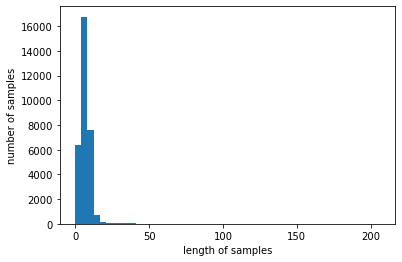

In [31]:
print('리뷰의 최대 길이 :',max(len(l) for l in ssa_int))
print('리뷰의 평균 길이 :',sum(map(len, ssa_int))/len(ssa_int))
plt.hist([len(s) for s in ssa_int], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [32]:
def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [33]:
max_len = 25
below_threshold_len(max_len, ssa_int)

전체 샘플 중 길이가 25 이하인 샘플의 비율: 99.1277161169298


In [34]:
# pad.sequences: 행렬 연산을 위해서 여러 문장의 길이를 임의로 동일하게 맞춰주는 작업
ssa_int_pad = pad_sequences(ssa_int, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)

#### (6) 모델링(Modeling)  
<br>

#### Dense Layer  
: 각 뉴런이 이전 계층의 모든 뉴런으로부터 입력을 받게 됨  
: 즉, 추출된 정보들을 하나의 레이어로 모으고 원하는 차원으로 축소시켜서 표현하기 위한 레이어
- 첫 번째 인자: 출력 뉴런의 수  
- input_dim: 입력 뉴런의 수  
- activation: 활성화 함수

#### GRU 모델링  
<b>* Sequential Model:</b>  순차적으로 layer를 더해나가는 방식  
<b>* Embedding Layer:</b> 문자 입력에 대해서 학습을 요할 때 필요한 레이어
- 첫 번째 인자: 단어 사전의 크기(=학습하고자 하는 단어의 수)  
- 두 번째 인자: output dimension  
- 세 번째 인자: 한 번에 학습하고자 하는 문장의 길이, 다음으로 플래튼 레이어가 오게 되면 반드시 명시해야함  

<b>* GRU:</b> LSTM 간소화 버전, LSTM보다 가중치가 적기 때문에 계산량이 적지만 좋은 성능을 냄  
예) model.add(GRU(hidden_size, input_shape=(timesteps, input_dim)))

In [35]:
import keras
from keras.layers import Embedding, Dense, GRU, LSTM, SimpleRNN
from keras.models import Sequential
from keras.models import load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [77]:
embedding_dim = 164
hidden_units = 256

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(GRU(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [81]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, None, 164)         1052880   
                                                                 
 gru_8 (GRU)                 (None, 256)               324096    
                                                                 
 dense_8 (Dense)             (None, 1)                 257       
                                                                 
Total params: 1,377,233
Trainable params: 1,377,233
Non-trainable params: 0
_________________________________________________________________


In [82]:
X_train = ssa_int_pad[:len(ssaa)] # 말뭉치만 넣어서 모델 훈련

In [83]:
len(X_train)

31067

In [84]:
# compile(): 모델을 기계가 이해할 수 있도록 컴파일함
# fit(): 모델 학습, 적합
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=es, batch_size=60, validation_split=0.2)

#callbacks=[es, mc],

Epoch 1/15
415/415 [==============================] - 28s 61ms/step - loss: 0.2610 - acc: 0.8991 - val_loss: 0.2067 - val_acc: 0.9199
Epoch 2/15
415/415 [==============================] - 25s 60ms/step - loss: 0.1955 - acc: 0.9258 - val_loss: 0.2561 - val_acc: 0.9025
Epoch 3/15
415/415 [==============================] - 25s 60ms/step - loss: 0.1791 - acc: 0.9313 - val_loss: 0.1923 - val_acc: 0.9223
Epoch 4/15
415/415 [==============================] - 25s 61ms/step - loss: 0.1638 - acc: 0.9390 - val_loss: 0.1923 - val_acc: 0.9245
Epoch 5/15
415/415 [==============================] - 25s 61ms/step - loss: 0.1506 - acc: 0.9437 - val_loss: 0.1920 - val_acc: 0.9260
Epoch 6/15
415/415 [==============================] - 25s 61ms/step - loss: 0.1368 - acc: 0.9504 - val_loss: 0.2078 - val_acc: 0.9203
Epoch 7/15
415/415 [==============================] - 25s 59ms/step - loss: 0.1248 - acc: 0.9549 - val_loss: 0.2045 - val_acc: 0.9266
Epoch 8/15
415/415 [==============================] - 24s 58ms

In [75]:
#loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

108/108 [==============================] - 1s 9ms/step - loss: 1.0640 - acc: 0.6390

 테스트 정확도: 0.6390


In [63]:
X_predict = ssa_int_pad[len(ssaa):]
X_predict = X_predict.reshape(918,25,1)

In [64]:
sent =[]
num=0
for i in range(len(X_predict)):
    print(num,'번째')
    n = 100 - len(aa[i])
    score = np.mean(model.predict(X_predict[i]))
    sent.append(score)
    num=num+1
    if(score > 0.5):
        print("{:.2f}% 확률로 긍정 리뷰입니다.".format(score * 100))
    else:
        print("{:.2f}% 확률로 부정 리뷰입니다.".format((1 - score) * 100)) 

0 번째
1/1 [==============================] - 0s 463ms/step
50.24% 확률로 긍정 리뷰입니다.
1 번째
1/1 [==============================] - 0s 19ms/step
51.06% 확률로 긍정 리뷰입니다.
2 번째
1/1 [==============================] - 0s 20ms/step
51.28% 확률로 긍정 리뷰입니다.
3 번째
1/1 [==============================] - 0s 19ms/step
50.48% 확률로 부정 리뷰입니다.
4 번째
1/1 [==============================] - 0s 21ms/step
51.65% 확률로 긍정 리뷰입니다.
5 번째
1/1 [==============================] - 0s 19ms/step
50.56% 확률로 긍정 리뷰입니다.
6 번째
1/1 [==============================] - 0s 21ms/step
51.13% 확률로 부정 리뷰입니다.
7 번째
1/1 [==============================] - 0s 21ms/step
50.63% 확률로 긍정 리뷰입니다.
8 번째
1/1 [==============================] - 0s 27ms/step
57.32% 확률로 긍정 리뷰입니다.
9 번째
1/1 [==============================] - 0s 21ms/step
52.07% 확률로 긍정 리뷰입니다.
10 번째
1/1 [==============================] - 0s 24ms/step
51.51% 확률로 긍정 리뷰입니다.
11 번째
1/1 [==============================] - 0s 23ms/step
51.32% 확률로 부정 리뷰입니다.
12 번째
1/1 [==============================] - 0s 21ms/step
50.

1/1 [==============================] - 0s 19ms/step
53.34% 확률로 긍정 리뷰입니다.
105 번째
1/1 [==============================] - 0s 20ms/step
53.43% 확률로 긍정 리뷰입니다.
106 번째
1/1 [==============================] - 0s 17ms/step
52.94% 확률로 긍정 리뷰입니다.
107 번째
1/1 [==============================] - 0s 18ms/step
50.59% 확률로 긍정 리뷰입니다.
108 번째
1/1 [==============================] - 0s 18ms/step
53.95% 확률로 긍정 리뷰입니다.
109 번째
1/1 [==============================] - 0s 20ms/step
56.70% 확률로 긍정 리뷰입니다.
110 번째
1/1 [==============================] - 0s 20ms/step
54.44% 확률로 긍정 리뷰입니다.
111 번째
1/1 [==============================] - 0s 19ms/step
50.26% 확률로 부정 리뷰입니다.
112 번째
1/1 [==============================] - 0s 18ms/step
52.78% 확률로 긍정 리뷰입니다.
113 번째
1/1 [==============================] - 0s 19ms/step
54.10% 확률로 긍정 리뷰입니다.
114 번째
1/1 [==============================] - 0s 19ms/step
50.94% 확률로 긍정 리뷰입니다.
115 번째
1/1 [==============================] - 0s 21ms/step
52.48% 확률로 부정 리뷰입니다.
116 번째
1/1 [==============================] - 0

1/1 [==============================] - 0s 20ms/step
50.91% 확률로 긍정 리뷰입니다.
207 번째
1/1 [==============================] - 0s 22ms/step
54.65% 확률로 긍정 리뷰입니다.
208 번째
1/1 [==============================] - 0s 18ms/step
51.60% 확률로 부정 리뷰입니다.
209 번째
1/1 [==============================] - 0s 20ms/step
50.33% 확률로 긍정 리뷰입니다.
210 번째
1/1 [==============================] - 0s 22ms/step
50.63% 확률로 긍정 리뷰입니다.
211 번째
1/1 [==============================] - 0s 18ms/step
56.34% 확률로 긍정 리뷰입니다.
212 번째
1/1 [==============================] - 0s 19ms/step
55.05% 확률로 긍정 리뷰입니다.
213 번째
1/1 [==============================] - 0s 22ms/step
53.77% 확률로 긍정 리뷰입니다.
214 번째
1/1 [==============================] - 0s 18ms/step
54.19% 확률로 긍정 리뷰입니다.
215 번째
1/1 [==============================] - 0s 18ms/step
51.72% 확률로 긍정 리뷰입니다.
216 번째
1/1 [==============================] - 0s 21ms/step
50.51% 확률로 부정 리뷰입니다.
217 번째
1/1 [==============================] - 0s 20ms/step
51.07% 확률로 긍정 리뷰입니다.
218 번째
1/1 [==============================] - 0

1/1 [==============================] - 0s 21ms/step
52.69% 확률로 긍정 리뷰입니다.
309 번째
1/1 [==============================] - 0s 20ms/step
50.79% 확률로 부정 리뷰입니다.
310 번째
1/1 [==============================] - 0s 19ms/step
54.44% 확률로 긍정 리뷰입니다.
311 번째
1/1 [==============================] - 0s 24ms/step
50.86% 확률로 긍정 리뷰입니다.
312 번째
1/1 [==============================] - 0s 20ms/step
52.28% 확률로 긍정 리뷰입니다.
313 번째
1/1 [==============================] - 0s 19ms/step
54.17% 확률로 긍정 리뷰입니다.
314 번째
1/1 [==============================] - 0s 20ms/step
51.14% 확률로 긍정 리뷰입니다.
315 번째
1/1 [==============================] - 0s 26ms/step
51.28% 확률로 긍정 리뷰입니다.
316 번째
1/1 [==============================] - 0s 20ms/step
54.18% 확률로 긍정 리뷰입니다.
317 번째
1/1 [==============================] - 0s 20ms/step
50.51% 확률로 부정 리뷰입니다.
318 번째
1/1 [==============================] - 0s 19ms/step
50.12% 확률로 부정 리뷰입니다.
319 번째
1/1 [==============================] - 0s 23ms/step
52.09% 확률로 부정 리뷰입니다.
320 번째
1/1 [==============================] - 0

1/1 [==============================] - 0s 20ms/step
52.71% 확률로 긍정 리뷰입니다.
411 번째
1/1 [==============================] - 0s 31ms/step
53.74% 확률로 긍정 리뷰입니다.
412 번째
1/1 [==============================] - 0s 21ms/step
53.42% 확률로 긍정 리뷰입니다.
413 번째
1/1 [==============================] - 0s 18ms/step
52.28% 확률로 부정 리뷰입니다.
414 번째
1/1 [==============================] - 0s 19ms/step
54.85% 확률로 긍정 리뷰입니다.
415 번째
1/1 [==============================] - 0s 20ms/step
53.92% 확률로 긍정 리뷰입니다.
416 번째
1/1 [==============================] - 0s 20ms/step
52.05% 확률로 부정 리뷰입니다.
417 번째
1/1 [==============================] - 0s 18ms/step
52.62% 확률로 긍정 리뷰입니다.
418 번째
1/1 [==============================] - 0s 18ms/step
50.78% 확률로 긍정 리뷰입니다.
419 번째
1/1 [==============================] - 0s 18ms/step
52.39% 확률로 긍정 리뷰입니다.
420 번째
1/1 [==============================] - 0s 22ms/step
53.35% 확률로 긍정 리뷰입니다.
421 번째
1/1 [==============================] - 0s 18ms/step
58.87% 확률로 긍정 리뷰입니다.
422 번째
1/1 [==============================] - 0

1/1 [==============================] - 0s 16ms/step
57.36% 확률로 긍정 리뷰입니다.
513 번째
1/1 [==============================] - 0s 20ms/step
53.90% 확률로 부정 리뷰입니다.
514 번째
1/1 [==============================] - 0s 18ms/step
50.24% 확률로 부정 리뷰입니다.
515 번째
1/1 [==============================] - 0s 18ms/step
52.12% 확률로 부정 리뷰입니다.
516 번째
1/1 [==============================] - 0s 18ms/step
57.28% 확률로 긍정 리뷰입니다.
517 번째
1/1 [==============================] - 0s 18ms/step
50.42% 확률로 긍정 리뷰입니다.
518 번째
1/1 [==============================] - 0s 18ms/step
50.93% 확률로 긍정 리뷰입니다.
519 번째
1/1 [==============================] - 0s 18ms/step
54.99% 확률로 긍정 리뷰입니다.
520 번째
1/1 [==============================] - 0s 18ms/step
53.09% 확률로 긍정 리뷰입니다.
521 번째
1/1 [==============================] - 0s 22ms/step
52.78% 확률로 부정 리뷰입니다.
522 번째
1/1 [==============================] - 0s 20ms/step
50.21% 확률로 부정 리뷰입니다.
523 번째
1/1 [==============================] - 0s 18ms/step
50.19% 확률로 부정 리뷰입니다.
524 번째
1/1 [==============================] - 0

1/1 [==============================] - 0s 21ms/step
54.95% 확률로 긍정 리뷰입니다.
615 번째
1/1 [==============================] - 0s 19ms/step
55.00% 확률로 긍정 리뷰입니다.
616 번째
1/1 [==============================] - 0s 18ms/step
50.75% 확률로 긍정 리뷰입니다.
617 번째
1/1 [==============================] - 0s 21ms/step
51.18% 확률로 부정 리뷰입니다.
618 번째
1/1 [==============================] - 0s 18ms/step
51.92% 확률로 부정 리뷰입니다.
619 번째
1/1 [==============================] - 0s 18ms/step
51.92% 확률로 부정 리뷰입니다.
620 번째
1/1 [==============================] - 0s 18ms/step
57.18% 확률로 긍정 리뷰입니다.
621 번째
1/1 [==============================] - 0s 21ms/step
57.92% 확률로 긍정 리뷰입니다.
622 번째
1/1 [==============================] - 0s 18ms/step
53.25% 확률로 긍정 리뷰입니다.
623 번째
1/1 [==============================] - 0s 19ms/step
57.25% 확률로 긍정 리뷰입니다.
624 번째
1/1 [==============================] - 0s 19ms/step
53.23% 확률로 긍정 리뷰입니다.
625 번째
1/1 [==============================] - 0s 21ms/step
50.67% 확률로 긍정 리뷰입니다.
626 번째
1/1 [==============================] - 0

1/1 [==============================] - 0s 18ms/step
51.59% 확률로 긍정 리뷰입니다.
717 번째
1/1 [==============================] - 0s 18ms/step
53.91% 확률로 긍정 리뷰입니다.
718 번째
1/1 [==============================] - 0s 18ms/step
54.36% 확률로 긍정 리뷰입니다.
719 번째
1/1 [==============================] - 0s 20ms/step
51.22% 확률로 부정 리뷰입니다.
720 번째
1/1 [==============================] - 0s 20ms/step
53.99% 확률로 긍정 리뷰입니다.
721 번째
1/1 [==============================] - 0s 18ms/step
50.19% 확률로 부정 리뷰입니다.
722 번째
1/1 [==============================] - 0s 20ms/step
52.04% 확률로 긍정 리뷰입니다.
723 번째
1/1 [==============================] - 0s 18ms/step
55.03% 확률로 부정 리뷰입니다.
724 번째
1/1 [==============================] - 0s 18ms/step
57.22% 확률로 긍정 리뷰입니다.
725 번째
1/1 [==============================] - 0s 22ms/step
52.12% 확률로 긍정 리뷰입니다.
726 번째
1/1 [==============================] - 0s 18ms/step
59.97% 확률로 긍정 리뷰입니다.
727 번째
1/1 [==============================] - 0s 20ms/step
50.84% 확률로 부정 리뷰입니다.
728 번째
1/1 [==============================] - 0

1/1 [==============================] - 0s 22ms/step
50.10% 확률로 긍정 리뷰입니다.
819 번째
1/1 [==============================] - 0s 18ms/step
60.10% 확률로 긍정 리뷰입니다.
820 번째
1/1 [==============================] - 0s 18ms/step
58.07% 확률로 긍정 리뷰입니다.
821 번째
1/1 [==============================] - 0s 18ms/step
52.13% 확률로 부정 리뷰입니다.
822 번째
1/1 [==============================] - 0s 20ms/step
50.63% 확률로 긍정 리뷰입니다.
823 번째
1/1 [==============================] - 0s 19ms/step
50.76% 확률로 긍정 리뷰입니다.
824 번째
1/1 [==============================] - 0s 18ms/step
53.60% 확률로 긍정 리뷰입니다.
825 번째
1/1 [==============================] - 0s 18ms/step
54.22% 확률로 긍정 리뷰입니다.
826 번째
1/1 [==============================] - 0s 18ms/step
59.12% 확률로 긍정 리뷰입니다.
827 번째
1/1 [==============================] - 0s 20ms/step
54.85% 확률로 긍정 리뷰입니다.
828 번째
1/1 [==============================] - 0s 20ms/step
53.07% 확률로 긍정 리뷰입니다.
829 번째
1/1 [==============================] - 0s 18ms/step
53.17% 확률로 부정 리뷰입니다.
830 번째
1/1 [==============================] - 0

In [50]:
df['sentiment'] = sent
df.to_csv('./crawling_data/apple_thinq_sentiment.csv', encoding='utf-8 sig')

In [51]:
df

,userName,date,rating,like,title,review,content,content_n,cotent_n_spell,sentiment
0,강남오렌지,2022-07-24 20:24:44-07:00,1,0,스마트케어 온도 설정,"기준 온도 직접 설정 27도로 설정해놨는데, 자꾸 희망온도가 28도로 올라감...하..","스마트케어 온도 설정 기준 온도 직접 설정 27도로 설정해놨는데, 자꾸 희망온도가 ...","['스마트', '케어', '온도', '설정', '기준', '온도', '직접', '설...","['스마트케어 온도 설정 기준 온도 직접 설정 도로 설정해놨는데', '자꾸 희망온도...",0.468290
1,우주괴에물,2022-07-24 08:08:11-07:00,1,0,TV 연결 안됨,유튜브나 넷플릭스에서는 같은 네트워크일 때 연결하겠습니까 잘 뜨는데 씽큐에서 제품연...,TV 연결 안됨 유튜브나 넷플릭스에서는 같은 네트워크일 때 연결하겠습니까 잘 뜨는데...,"['TV', '연결', '유튜브', '넷플릭스', '네트워크', '연결하다', '자...","['TV 연결 안 됨 유튜브나 넷플릭스에서는 같은 네트워크일 때 연결하겠습니까', ...",0.516256
2,ㅇ헣ㄹㅇ,2022-07-24 05:57:38-07:00,5,0,굿,엘지 iot 시작,굿 엘지 iot 시작,"['굿', '엘지', 'iot', '시작']",['굿 엘지 iot 시작'],0.462415
3,까암씨,2022-07-23 22:59:15-07:00,5,0,건조기 등록이 너무 어려워 별 4 개요,건조기 등록이 너무 잘안되용. 그래서 4 개 입니다.,건조기 등록이 너무 어려워 별 4 개요 건조기 등록이 너무 잘안되용. 그래서 4 개...,"['건조기', '등록', '너무', '어렵다', '별', '개요', '건조기', '...","['건조기 등록이 너무 어려워 별 개요 건조기 등록이 너무 잘 안돼요', '그래서 ...",0.447790
4,라이프이즈구웃,2022-07-23 07:35:17-07:00,4,0,백색가전은 엘지,앱으로 가전 제품 관리하기가 용이해요,백색가전은 엘지 앱으로 가전 제품 관리하기가 용이해요,"['백색', '가전', '엘지', '앱', '가전제품', '관리', '용이하다']",['백색가전은 엘지 앱으로 가전제품 관리하기가 용이해요'],0.480265
...,...,...,...,...,...,...,...,...,...,...
913,ㅎㅎㅋㅋㅎㅎㄹㅋㄱㅁ,2019-06-22 04:15:25-07:00,3,0,우와 했는데,오늘 에어컨 설치하고 어플받고 제품등록 싹하고 기존에 있던 공기청정기 등록 다하고 ...,우와 했는데 오늘 에어컨 설치하고 어플받고 제품등록 싹하고 기존에 있던 공기청정기 ...,"['오늘', '에어컨', '설치', '어플', '받다', '제품', '등록', '싹...",['우와 했는데 오늘 에어컨 설치하고 어플 받고 제품 등록 싹하고 기존에 있던 공기...,0.530520
914,샤레레마,2018-04-26 16:36:23-07:00,5,0,관리를 안하는건가요?,원격제품은 팔아놓으시고 서비스관리는 안하시는 건가요? 저번에도 그랬는데 어제부터 서...,관리를 안하는건가요? 원격제품은 팔아놓으시고 서비스관리는 안하시는 건가요? 저번에도...,"['관리', '건가', '원격', '제품', '파다', '서비스', '관리', '건...",['관리를 안 하는 건가요 원격 제품은 팔아놓으시고 서비스 관리는 안 하시는 건가요...,0.483015
915,Myoyu,2021-08-28 16:29:22-07:00,2,0,업데이트후 제습기 예약 동작 오류,"매일, 일정시간에 켜고 일정시간후 끄기 예약 기능 잘 사용하고 있었는데 업데이트후 ...","업데이트후 제습기 예약 동작 오류 매일, 일정시간에 켜고 일정시간후 끄기 예약 기능...","['업데이트', '제습기', '예약', '동작', '오류', '매일', '일정', ...",['업데이트 후 제습기 예약 동작 오류 매일 일정 시간에 켜고 일정 시간 후 끄기 ...,0.436137
916,초등학생,2021-08-22 00:19:29-07:00,3,0,에어컨 네트워크 보안 WPA3 지원요청,에어컨 네트워크 보안 WAP3 지원 요청합니다.\n\n현재는 지원을 안해서 WPA/...,에어컨 네트워크 보안 WPA3 지원요청 에어컨 네트워크 보안 WAP3 지원 요청합니...,"['에어컨', '네트워크', '보안', 'WPA', '지원', '요청', '에어컨'...",['에어컨 네트워크 보안 WPA 지원 요청 에어컨 네트워크 보안 WAP 지원 요청합...,0.445189


In [56]:
df['content_n'][(df['sentiment']<0.50)].index

Int64Index([  0,   2,   3,   4,   5,   6,   7,  10,  11,  12,
            ...
            899, 905, 908, 909, 910, 911, 914, 915, 916, 917],
           dtype='int64', length=602)

In [57]:
df.iloc[899]

userName                                               별 하나도 아깝다ㄷ ㄷ
date                                      2019-06-27 20:27:01-07:00
rating                                                            2
like                                                              0
title                                                 대체적으로 유용하긴 한데
review            얼마전에 앱 점검을 하더니 알림이 안오기 시작하네요 전엔 앱을 켜지 않아도 세탁기나...
content           대체적으로 유용하긴 한데 얼마전에 앱 점검을 하더니 알림이 안오기 시작하네요 전엔 ...
content_n         ['체적', '유용하다', '전', '앱', '점검', '알림', '오기', '시작...
cotent_n_spell    ['대체적으로 유용하긴 한데 얼마 전에 앱 점검을 하더니 알림이 안 오기 시작하네요...
sentiment                                                  0.472369
Name: 899, dtype: object